In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Loading the Dataset
In this classification approach we will be using Logistic Regression, Gaussian Naïve Bayes, Linear SVC

In [412]:
bbc_data = pd.read_csv('bbc_news.csv')
print(bbc_data.shape)
bbc_data

(500, 4)


,body,title,filename,category
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech
...,...,...,...,...
495,Wales coach Mike Ruddock says England lock Dan...,Wales critical of clumsy Grewcock,bbc/sport/307.txt,sport
496,Tim Henman saved a match point before fighting...,Henman overcomes rival Rusedski,bbc/sport/421.txt,sport
497,Newly-crowned Australian Open champion Marat S...,Safin cool on Wimbledon,bbc/sport/489.txt,sport
498,The International Association of Athletics Fed...,IAAF will contest Greek decision,bbc/sport/081.txt,sport


In [413]:
# Rename the colums title to "News_Headline and body to Content"
bbc_data.rename(columns={'title': 'News_Headline', 'body': 'Content'}, inplace=True)
bbc_data.dropna(axis=1)
bbc_data.shape

(500, 4)

# Visualization of the Dataset

<Axes: xlabel='count', ylabel='category'>

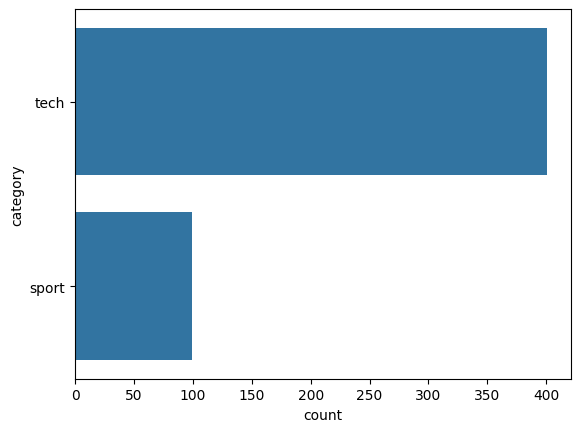

In [414]:
sns.countplot(bbc_data.category)

# Visualize the number of stop words present in our dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sruthipg/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


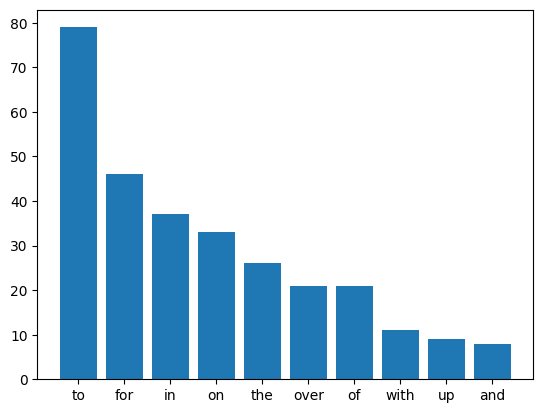

In [415]:
import nltk
from nltk import download
download('stopwords')
from nltk.corpus import stopwords
def plot_stopwords(data):
    sw_nltk = stopwords.words('english')
    print(sw_nltk)
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    from collections import defaultdict
    dictionary_stopwords=defaultdict(int)
    for word in corpus:
        if word in sw_nltk:
            dictionary_stopwords[word]+=1
            
    top=sorted(dictionary_stopwords.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)
plot_stopwords(bbc_data['News_Headline'])


# Determine the most frequently occurring words in our dataset using rainbow plot

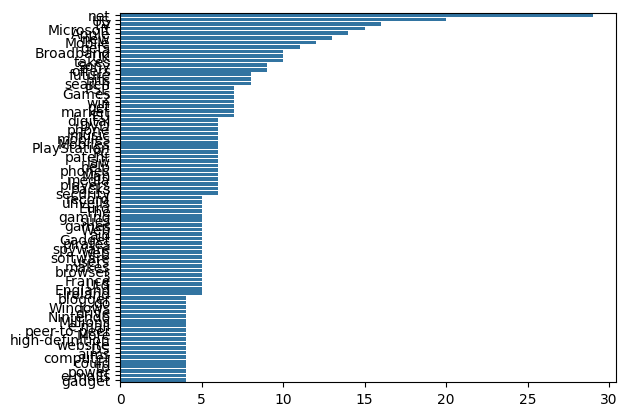

In [416]:
from collections import Counter
def top_frequent_words(data):
    stop=set(stopwords.words('english'))
    stop.add('called')
    data_split= data.str.split()
    data_list=data_split.values.tolist()
    corpus=[word for i in data_list for word in i]
    counter=Counter(corpus)
    mostCommon=counter.most_common()
    x, y=[], []
    for word,count in mostCommon[:100]:
        if (word not in stop):
            x.append(word)
            y.append(count)   
    sns.barplot(x=y,y=x)

top_frequent_words(bbc_data['News_Headline'])

# Create a word cloud to visualize all the words in our dataset

In [417]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
download('punkt')

[nltk_data] Downloading package punkt to /Users/sruthipg/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Global blogger action day called Global digital divide 'narrowing' Sporting rivals go to extra time Warning over Windows Word files Satellite mapping aids Darfur relief DVD copy protection strengthened Text message record smashed again TV's future down the phone line Intel unveils laser breakthrough Piero gives rugby perspective Looks and music to drive mobiles Nintendo handheld given Euro date Anti-spam screensaver scrapped Millions to miss out on the net The gaming world in 2005 Broadband in the UK gathers pace Cyber crime booms in 2004 Rivals of the £400 Apple... Local net TV takes off in Austria BT program to beat dialler scams Virus poses as Christmas e-mail Movie body hits peer-to-peer nets Sony PSP tipped as a 'must-have' Norway upholds 'Napster' ruling Millions to miss out on the net Gritty return for Prince of Persia IBM puts cash behind Linux push US woman sues over ink cartridges More movies head to Sony's PSP Sony PSP handheld console hits US What high-definition will do to

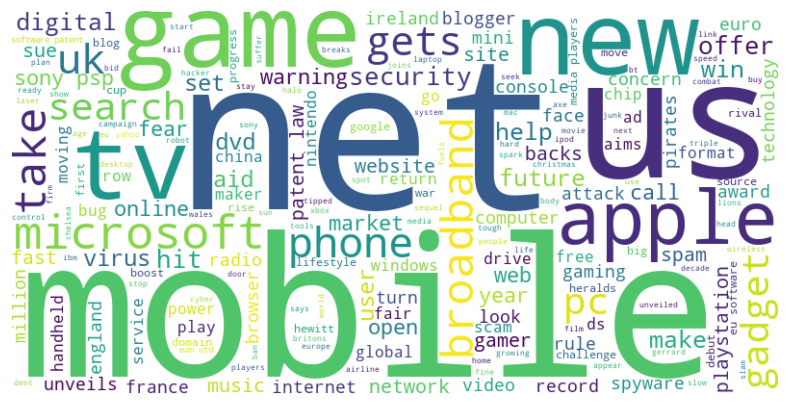

In [418]:

bbc_txt = ' '.join(bbc_data['News_Headline'])
print(bbc_txt)
# Tokenize the text into words
words = word_tokenize(bbc_txt)
print(words)
# Remove stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('called')
print(stop_words)
filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Create a string from the filtered words
filtered_text = ' '.join(filtered_words)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()



# Data Preprocessing

In [419]:
def tokenize_text(text):
    # Split paragraphs (you may need to adjust this based on your actual paragraph separator)
    paragraphs = text.split('\n')  # Assuming paragraphs are separated by newlines

    # Tokenize each paragraph into sentences and then tokenize sentences into words
    tokenized_paragraphs = []
    for paragraph in paragraphs:
        # Tokenize paragraphs into sentences
        sentences = sent_tokenize(paragraph)
        stop_words = set(stopwords.words('english'))
        stop_words.add('called')
        # Tokenize sentences into words
        tokenized_sentences = [word_tokenize(sentence) for sentence in sentences]
        filtered_sentences = [[word.lower() for word in sentence if word.isalpha() and word.lower() not in stop_words]
        for sentence in tokenized_sentences]

        # Print the tokenized and filtered sentences
        for idx, sentence in enumerate(filtered_sentences, 1):
            tokenized_paragraphs.append(sentence)
    return tokenized_paragraphs
# Apply tokenization to each row in the 'text' column
bbc_data['clean_text'] = bbc_data['News_Headline'].apply(tokenize_text)

In [420]:
def flatten_and_convert_to_csv(nested_list):
    flat_list = [item for sublist in nested_list for item in sublist]
    return flat_list
bbc_data['clean_text'] = bbc_data['clean_text'].apply(flatten_and_convert_to_csv)
bbc_data['clean_text'] = [' '.join(strings) for strings in bbc_data['clean_text']]

bbc_data.head()

,Content,News_Headline,filename,category,clean_text
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech,global blogger action day
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech,global digital divide
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech,sporting rivals go extra time
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech,warning windows word files
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech,satellite mapping aids darfur relief


# Stemming and Lemmatization

Stemming is the practice of removing the last few characters from a word, which frequently results in inaccurate spelling and meanings. By taking context into account, lemmatization reduces a term to its logical base form or lemma.

In [421]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/sruthipg/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [422]:
bbc_data['clean_text'].tolist()

['global blogger action day',
 'global digital divide',
 'sporting rivals go extra time',
 'warning windows word files',
 'satellite mapping aids darfur relief',
 'dvd copy protection strengthened',
 'text message record smashed',
 'tv future phone line',
 'intel unveils laser breakthrough',
 'piero gives rugby perspective',
 'looks music drive mobiles',
 'nintendo handheld given euro date',
 'screensaver scrapped',
 'millions miss net',
 'gaming world',
 'broadband uk gathers pace',
 'cyber crime booms',
 'rivals apple',
 'local net tv takes austria',
 'bt program beat dialler scams',
 'virus poses christmas',
 'movie body hits nets',
 'sony psp tipped',
 'norway upholds ruling',
 'millions miss net',
 'gritty return prince persia',
 'ibm puts cash behind linux push',
 'us woman sues ink cartridges',
 'movies head sony psp',
 'sony psp handheld console hits us',
 'dvds',
 'honour uk games maker',
 'bush website blocked outside us',
 'web logs aid disaster recovery',
 'games maker figh

In [423]:

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
tokenized_dataset = [word_tokenize(sentence) for sentence in bbc_data['clean_text'].tolist()]
filtered_dataset = [
    [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    for tokens in tokenized_dataset
]


In [424]:
# Stemming
porter_stemmer = PorterStemmer()
stemmed_dataset = [
    [porter_stemmer.stem(word) for word in tokens]
    for tokens in filtered_dataset
]

bbc_data['clean_text'] = stemmed_dataset
bbc_data['clean_text'] = [','.join(strings) for strings in bbc_data['clean_text']]
bbc_data.head()


,Content,News_Headline,filename,category,clean_text
0,The global web blog community is being called ...,Global blogger action day called,bbc/tech/016.txt,tech,"global,blogger,action,day"
1,"The ""digital divide"" between rich and poor nat...",Global digital divide 'narrowing',bbc/tech/033.txt,tech,"global,digit,divid"
2,The current slew of sports games offers unpara...,Sporting rivals go to extra time,bbc/tech/056.txt,tech,"sport,rival,go,extra,time"
3,Writing a Microsoft Word document can be a dan...,Warning over Windows Word files,bbc/tech/086.txt,tech,"warn,window,word,file"
4,"Aid workers trying to house, feed and clothe m...",Satellite mapping aids Darfur relief,bbc/tech/223.txt,tech,"satellit,map,aid,darfur,relief"


In [425]:
print("\nTokenized and Filtered Dataset:")
for tokens in bbc_data['clean_text']:
    print(tokens)



Tokenized and Filtered Dataset:
global,blogger,action,day
global,digit,divid
sport,rival,go,extra,time
warn,window,word,file
satellit,map,aid,darfur,relief
dvd,copi,protect,strengthen
text,messag,record,smash
tv,futur,phone,line
intel,unveil,laser,breakthrough
piero,give,rugbi,perspect
look,music,drive,mobil
nintendo,handheld,given,euro,date
screensav,scrap
million,miss,net
game,world
broadband,uk,gather,pace
cyber,crime,boom
rival,appl
local,net,tv,take,austria
bt,program,beat,dialler,scam
viru,pose,christma
movi,bodi,hit,net
soni,psp,tip
norway,uphold,rule
million,miss,net
gritti,return,princ,persia
ibm,put,cash,behind,linux,push
us,woman,sue,ink,cartridg
movi,head,soni,psp
soni,psp,handheld,consol,hit,us
dvd
honour,uk,game,maker
bush,websit,block,outsid,us
web,log,aid,disast,recoveri
game,maker,fight,surviv
half,measur
freez,campaign
mobil,doubl,bu,ticket
nintendo,ds,aim,touch,gamer
smash,home,comput
speech,take,search,engin
game,win,dvd,format
blind,student,colour
game,maker,get,x

# Encoding Data

The process of encoding meaningful text into number/vector representation to maintain the relationship between words and sentences is called Encoding 
In this project, we will encode our dataset using the TF-IDF Vectorizer in NLP.

In [426]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))

tf_idf1 = tf_idf.fit_transform(bbc_data['clean_text'])

tf_idf1


<500x854 sparse matrix of type '<class 'numpy.float64'>'
	with 1878 stored elements in Compressed Sparse Row format>

To conclude, we will map the numerical values to the various categories of our dataset:

In [427]:
bbc_data.category = bbc_data.category.map({'tech':0, 'business':1, 'sport':2, 'entertainment':3, 'politics':4})
bbc_data.category.unique()


array([0, 2])

# Model Training

Before moving on with model training, we will split our dataset into train and test using train_test_split() provided by sklearn.

In [432]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer


In [431]:

X = bbc_data.clean_text
y = bbc_data.category
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

To remove spaces, commas, exclamation, etc., we will use the CountVectorizer() function.

In [433]:
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
vector.vocabulary_
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)

# Logistic Regression

In [434]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()
logistic_reg.fit(X_transformed, y_train)
# Fitting our Logistic Regression Model

LogisticRegression()

# Naive Bayes

In [435]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

# Linear SVM (Support Vector Machine)

In [436]:
# Importing SVM
from sklearn.svm import SVC, LinearSVC

svm = LinearSVC()
svm.fit(X_transformed, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

# Logistic Regression Metrics

In [438]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(logistic_reg.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.87       148
           2       0.06      1.00      0.11         2

    accuracy                           0.78       150
   macro avg       0.53      0.89      0.49       150
weighted avg       0.99      0.78      0.86       150



[[114  25]
 [  1  10]]


# Naive Bayes Metrics

In [439]:
print(classification_report(naivebayes.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       139
           2       0.29      0.91      0.43        11

    accuracy                           0.83       150
   macro avg       0.64      0.86      0.67       150
weighted avg       0.94      0.83      0.86       150



[[114  25]
 [  1  10]]


# Linear SVM Metrics

In [440]:
print(classification_report(svm.predict(X_test_transformed), y_test))
print('\n')
print(confusion_matrix(svm.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       139
           2       0.29      0.91      0.43        11

    accuracy                           0.83       150
   macro avg       0.64      0.86      0.67       150
weighted avg       0.94      0.83      0.86       150



[[114  25]
 [  1  10]]
